In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from tqdm import tqdm
import numpy as np
from PIL import Image
from csbdeep.utils import normalize
import tifffile as tiff
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualize Training Logs

In [12]:
training="202508041050"

In [20]:
metrics = pd.read_parquet(f"pth/{training}/metrics.parquet", engine="fastparquet")

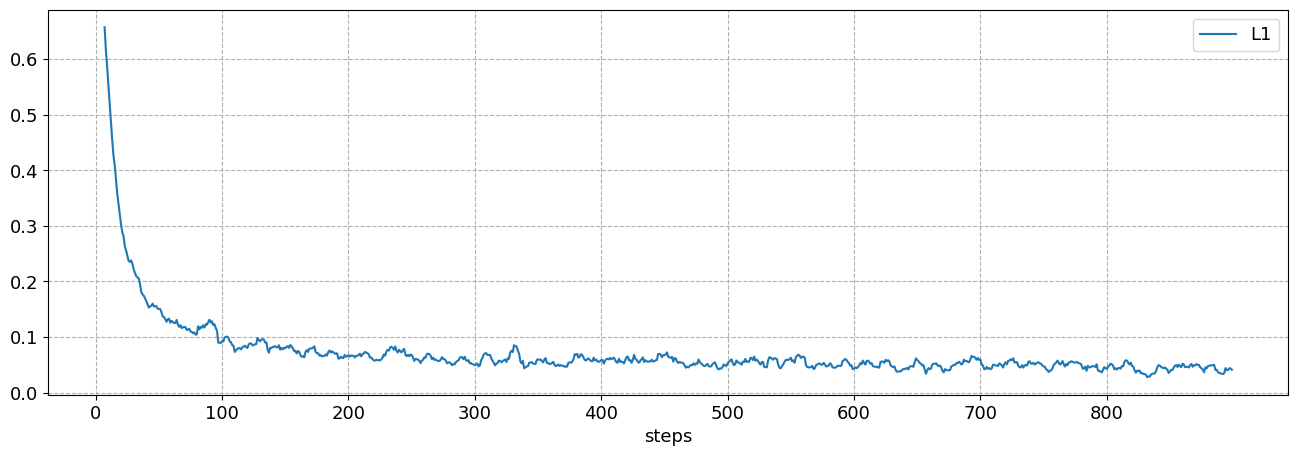

In [21]:
df = pd.DataFrame(
    {
        "steps": range(len(metrics)),
        "L1": metrics['MSE'].rolling(8).mean(),
    }
)
ax = df.plot(x="steps", figsize=(16, 5))
ax.set_xticks(range(0, len(df), 100));